In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!nvidia-smi

Tue May 13 09:00:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# ML

In [3]:
df = pd.read_csv("lung_cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.shape

(309, 16)

In [5]:
df.duplicated().sum()

np.int64(33)

In [6]:
df=df.drop_duplicates()

In [7]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [9]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])


In [10]:
type(df['GENDER'][0])

numpy.int64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
numerical_cols=['AGE', 'GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']

In [13]:
numerical_cols

['AGE',
 'GENDER',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN']

In [14]:
len(numerical_cols)

15

In [15]:
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [16]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,YES
1,1.0,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,YES
2,0.0,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,NO
3,1.0,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NO
4,0.0,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.0,0.575758,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,YES
280,0.0,0.575758,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NO
281,1.0,0.515152,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NO
282,1.0,0.378788,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NO


In [17]:
import pickle
with open("lung_scaler","wb") as f:
    pickle.dump(scaler,f)

In [18]:
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [19]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1.0,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
2,0.0,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
3,1.0,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
4,0.0,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.0,0.575758,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
280,0.0,0.575758,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
281,1.0,0.515152,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
282,1.0,0.378788,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0


In [20]:
df.shape

(276, 16)

In [21]:
X=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
model=GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
#accuracy

print(model.score(X_test, y_test))

0.9009009009009009


In [ ]:
accuracy_NB=accuracy_score(y_test,y_pred)
print(accuracy_NB)

0.9009009009009009


In [ ]:
#Decision tree

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model1=DecisionTreeClassifier()

In [ ]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model1.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
accuracy_DT=accuracy_score(y_test,y_pred)
print(accuracy_DT)

0.8928571428571429


In [ ]:
#Random Forest

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2=RandomForestClassifier()

In [ ]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model2.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_RF=accuracy_score(y_test,y_pred)
print(accuracy_DT)

0.8928571428571429


In [ ]:
#SVM

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model3=SVC()

In [ ]:
model3.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=model3.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_SVM=accuracy_score(y_test,y_pred)
print(accuracy_SVM)

0.8392857142857143


In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model4=KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=model4.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)

0.9464285714285714


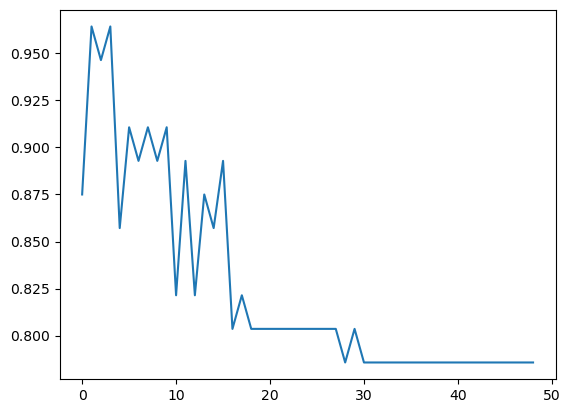

In [ ]:
acc=[]
for i in range(1,50):
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
plt.plot(acc)

In [ ]:
acc[3]

0.9642857142857143

In [ ]:
model4=KNeighborsClassifier(n_neighbors=3)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
accuracy_KNN=accuracy_score(y_test,y_pred)

In [ ]:
#Logistic Resgression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model5=LogisticRegression()

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
model5.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model5.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_LR=accuracy_score(y_test,y_pred)
print(accuracy_LR)

0.891566265060241


In [ ]:
#plot

In [ ]:
y_plot=[accuracy_NB,accuracy_DT,accuracy_RF,accuracy_SVM,accuracy_KNN,accuracy_LR]
X_plot=['NB','DT','RF','SVM','KNN','LR']


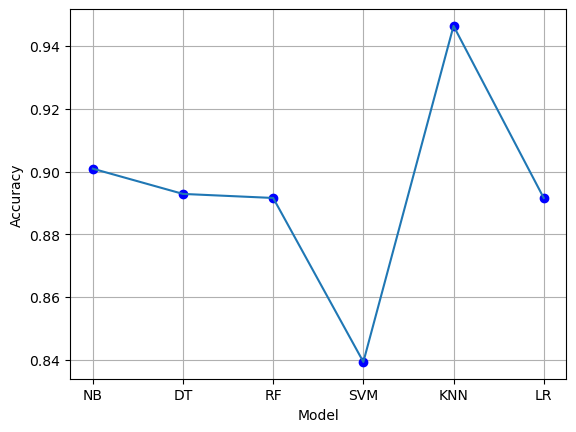

In [ ]:
plt.plot(X_plot, y_plot, 'o', color='blue')
plt.plot(X_plot, y_plot)
plt.grid(True)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import pickle

In [ ]:
with open("NB_model","wb") as handler1:
    pickle.dump(model,handler1)


In [ ]:
with open("DT_model","wb") as handler2:
    pickle.dump(model1, handler2)

In [ ]:
with open("RF_model","wb") as handler3:
    pickle.dump(model2,handler3)

In [ ]:
with open("SVM_model","wb") as handler4:
    pickle.dump(model3,handler4)

In [ ]:
with open("KNN_model","wb") as handler5:
    pickle.dump(model4,handler5)

In [ ]:
with open("LR_model","wb") as handler6:
    pickle.dump(model5,handler6)

# DL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
dl_model = Sequential()
dl_model.add(Dense(500, input_dim=15, activation='relu'))
dl_model.add(Dense(100, activation='relu'))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dl_model.compile(optimizer='adam',
         loss='binary_crossentropy',
         metrics=['accuracy'])

dl_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7130 - loss: 0.5752  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8707 - loss: 0.3250 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.3344 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8636 - loss: 0.3053 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8642 - loss: 0.2679 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8681 - loss: 0.2531 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8794 - loss: 0.2218 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9025 - loss: 0.2108 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9185 - loss: 0.1834 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9196 - loss: 0.1640 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9160 - loss: 0.1792 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9097 - lo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred_dl = dl_model.predict(X_test)
y_pred_dl = (y_pred_dl > 0.5) #converting into binary 1 and 0


cm = confusion_matrix(y_test,y_pred_dl)
print("Confusion Matrix: ")
print(cm)

cr = classification_report(y_test,y_pred_dl)
print("Classification Report: ")
print(cr)

acc = accuracy_score(y_test,y_pred_dl)
print("Accuracy: ",acc)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Confusion Matrix: 
[[ 4  9]
 [ 1 69]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.31      0.44        13
           1       0.88      0.99      0.93        70

    accuracy                           0.88        83
   macro avg       0.84      0.65      0.69        83
weighted avg       0.87      0.88      0.86        83

Accuracy:  0.8795180722891566


In [ ]:
with open("DL_model","wb") as handler7:
    pickle.dump(dl_model,handler7)

### QNN

In [22]:
#installing dependencies
!pip install qiskit==1.4.2
!pip install qiskit-machine-learning
!pip install qiskit-aer
!pip install qiskit-algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 7.4 MB/s eta 0:00:00


In [23]:
#version of installs
!pip freeze | grep qiskit
!python --version

qiskit==1.4.2
qiskit-aer==0.17.0
qiskit-algorithms==0.3.1
qiskit-machine-learning==0.8.2
Python 3.11.12


In [24]:
#imports
import numpy as np
from qiskit_aer import Aer
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_algorithms.optimizers import COBYLA

In [25]:
np.random.seed(42)

In [26]:
#initializing train test and split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# Define feature map and ansatz
feature_dim = X_train.shape[1]  # Ensure feature_dim matches the number of features
input_params = ParameterVector("x", feature_dim)
weight_params = ParameterVector("w", RealAmplitudes(feature_dim, reps=1).num_parameters)

In [28]:
qc = QuantumCircuit(feature_dim)
for i in range(feature_dim):
    qc.ry(input_params[i], i)
qc.compose(RealAmplitudes(feature_dim, reps=1, entanglement='linear').assign_parameters(weight_params), inplace=True)

In [29]:
# Define Quantum Neural Network (QNN)
qnn = EstimatorQNN(
    circuit=qc,
    input_params=input_params,
    weight_params=weight_params
)

<ipython-input-29-b148a9c9686d>:2: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(


In [30]:
# Define Quantum Neural Network (QNN)
qnn = EstimatorQNN(
    circuit=qc,
    input_params=input_params,
    weight_params=weight_params
)

<ipython-input-30-b148a9c9686d>:2: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(


In [31]:
# Define Quantum Neural Network Classifier
classifier = NeuralNetworkClassifier(
    neural_network=qnn,
    optimizer=COBYLA(maxiter=100)
)

In [32]:
# Train the model
classifier.fit(X_train, y_train)

In [33]:
# Make predictions on test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.7857

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      1.00      0.88        44

    accuracy                           0.79        56
   macro avg       0.39      0.50      0.44        56
weighted avg       0.62      0.79      0.69        56


Confusion Matrix:
[[ 0 12]
 [ 0 44]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# Save the model to a file
with open('qnn_model.pkl', 'wb') as handler8:
    pickle.dump(classifier, handler8)